<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU45_Planificación y promoción del destino en base a los patrones en origen de los turistas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>14.- Feature Data Transform</font>

<font color='steelblue'>Feature Data Transform is the process that allows change (if is required) the type and/or distribution of data features (e.g. scaling, normalizing o standardizing data features).</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Basic Data Transforms						
    
<font color='steelblue'><b>Perform Categorical Variable Transformation						
- Encode Transformation					
    - One-hot encoding				
    - Ordinal encoding				
    - Dummy encoding				
- Evaluate a Logistic Regression model					
- Consider Embedding if text mining context					
    
<font color='steelblue'><b>Perform Numeric Variable Transformation						
- Scale Transformation					
    - Normalization				
    - Standardization				
    - IQR Robust Scaler Transform				
    - Evaluate a KNN model				
- Distribution Transformation					
    - Discretization				
        - Uniform			
        - Clustered(k-Means)			
        - Quantile			
            - Normal Quantile		
            - Uniform Quantile		
            - Evaluate a KNN model		
        - Evaluate a KNN model			
    - Power transforms (Make Distributions More Gaussian)				
        - Box-Cox Transform			
        - Yeo-Johnson Transform			
        - Evaluate a KNN model			


## Consideraciones casos CitizenLab programados en R

* Algunas de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Otras tareas típicas de este proceso se realizan en los notebooks del dominio IV al ser más eficiente realizarlas en el propio pipeline de modelización.
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_45_08_03_turismo_receptor.csv</font>
- <font color='steelblue'> <b>Sampled Input File: CU_45_07_03_turismo_receptor.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(forcats)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_45_08_03_turismo_receptor.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_45_08_03_turismo_receptor.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 50294 Columns: 9
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (3): mun_dest_cod, turistas, Target
lgl (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Estructura de  los datos:

In [10]:
data |> glimpse()

Rows: 50,294
Columns: 9
$ mes           <chr> "2019-08", "2021-07", "2021-07", "2022-01", "2019-08", "…
$ pais_orig_cod <chr> "110", "010", "010", "000", "128", "000", "011", "126", …
$ pais_orig     <chr> "Francia", "Total Europa", "Total Europa", "Total", "Rum…
$ mun_dest_cod  <dbl> 28161, 28176, 28132, 28141, 28130, 28126, 28075, 28005, …
$ mun_dest      <chr> "Valdemoro", "Villanueva de la Cañada", "San Martín de l…
$ turistas      <dbl> 466, 1375, 465, 54, 135, 30, 285, 768, 31, 1646, 116, 36…
$ CMUN          <chr> "161", "176", "132", "141", "130", "126", "075", "005", …
$ Target        <dbl> 466, 1375, 465, 54, 135, 30, 285, 768, 31, 1646, 116, 36…
$ is_train      <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TR…


Muestra de los primeros datos:

In [11]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target,is_train
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
2019-08,110,Francia,28161,Valdemoro,466,161,466,TRUE
2021-07,010,Total Europa,28176,Villanueva de la Cañada,1375,176,1375,TRUE
2021-07,010,Total Europa,28132,San Martín de la Vega,465,132,465,TRUE
2022-01,000,Total,28141,Sevilla la Nueva,54,141,54,TRUE
2019-08,128,Rumania,28130,San Fernando de Henares,135,130,135,TRUE


## Basic Data Transforms

### Data Selecting

In [12]:
data |> select(1)

mes
<chr>
2019-08
2021-07
2021-07
2022-01
2019-08
2022-07
2022-08
2022-03
2020-01


### Data Filtering

In [15]:
data |> filter(pais_orig == "Francia")

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target,is_train
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>
2019-08,110,Francia,28161,Valdemoro,466,161,466,TRUE
2021-09,110,Francia,28005,Alcalá de Henares,1646,005,1646,TRUE
2022-10,110,Francia,28066,Griñón,37,066,37,TRUE
2022-03,110,Francia,28903,Tres Cantos,538,903,538,TRUE
2020-03,110,Francia,28058,Fuenlabrada,950,058,950,TRUE
2020-12,110,Francia,28068,Guadarrama,96,068,96,TRUE
2020-07,110,Francia,28053,Daganzo de Arriba,54,053,54,TRUE
2020-05,110,Francia,28054,"Escorial, El",41,054,41,TRUE
2022-08,110,Francia,28009,Algete,100,009,100,TRUE


### Insert New Column

In [16]:
data |>
    mutate(x = TRUE)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target,is_train,x
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>
2019-08,110,Francia,28161,Valdemoro,466,161,466,TRUE,TRUE
2021-07,010,Total Europa,28176,Villanueva de la Cañada,1375,176,1375,TRUE,TRUE
2021-07,010,Total Europa,28132,San Martín de la Vega,465,132,465,TRUE,TRUE
2022-01,000,Total,28141,Sevilla la Nueva,54,141,54,TRUE,TRUE
2019-08,128,Rumania,28130,San Fernando de Henares,135,130,135,TRUE,TRUE
2022-07,000,Total,28126,Robregordo,30,126,30,TRUE,TRUE
2022-08,011,Total Unión Europea,28075,Loeches,285,075,285,TRUE,TRUE
2022-03,126,Alemania,28005,Alcalá de Henares,768,005,768,TRUE,TRUE
2020-01,121,Países Bajos,28066,Griñón,31,066,31,TRUE,TRUE


### Delete Column

In [17]:
col <- "pais_orig"

In [18]:
data %>% select(all_of(col))

pais_orig
<chr>
Francia
Total Europa
Total Europa
Total
Rumania
Total
Total Unión Europea
Alemania
Países Bajos


### Rank Data

<font color='darkgrey'><b>Operation</font>

In [19]:
data |> mutate(rank = order(Target))

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target,is_train,rank
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<lgl>,<int>
2019-08,110,Francia,28161,Valdemoro,466,161,466,TRUE,6
2021-07,010,Total Europa,28176,Villanueva de la Cañada,1375,176,1375,TRUE,34
2021-07,010,Total Europa,28132,San Martín de la Vega,465,132,465,TRUE,130
2022-01,000,Total,28141,Sevilla la Nueva,54,141,54,TRUE,134
2019-08,128,Rumania,28130,San Fernando de Henares,135,130,135,TRUE,137
2022-07,000,Total,28126,Robregordo,30,126,30,TRUE,176
2022-08,011,Total Unión Europea,28075,Loeches,285,075,285,TRUE,194
2022-03,126,Alemania,28005,Alcalá de Henares,768,005,768,TRUE,229
2020-01,121,Países Bajos,28066,Griñón,31,066,31,TRUE,289


## Numeric Variable Transformation: Scale

### Normalization Transform

<font color='tomato'>Select columns</font>

In [25]:
numeric_cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Processing column: mun_dest_cod 


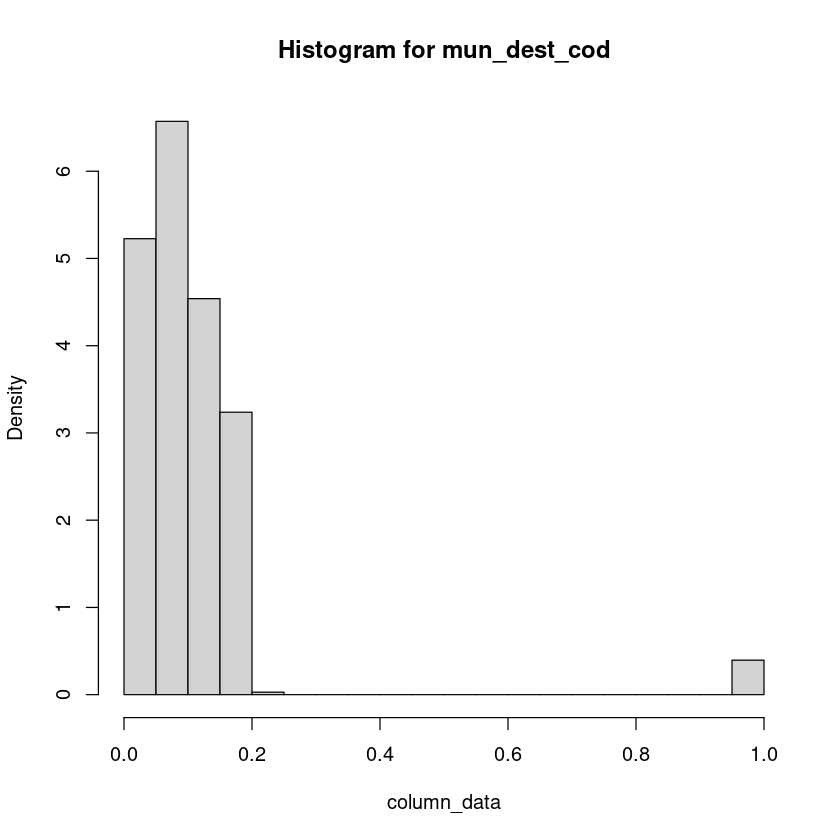

NULL
Processing column: turistas 


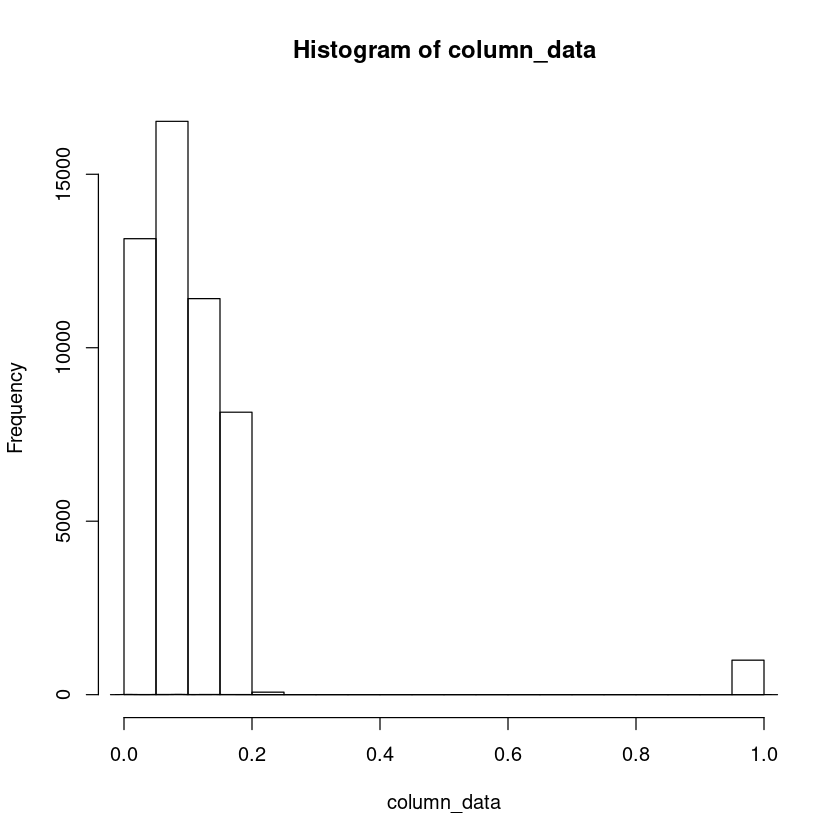

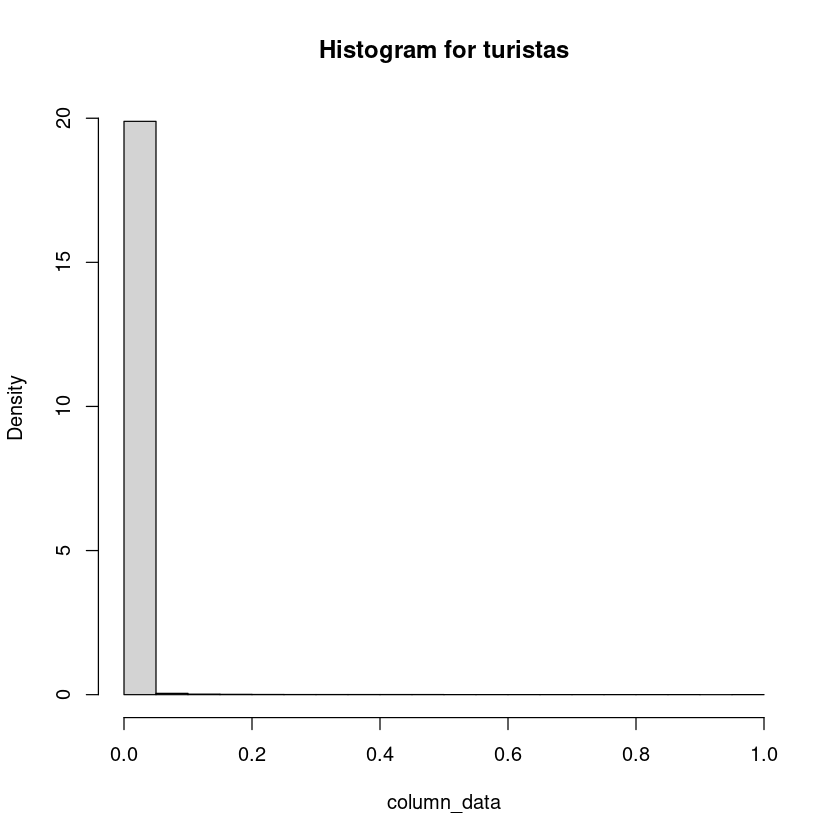

NULL
Processing column: Target 


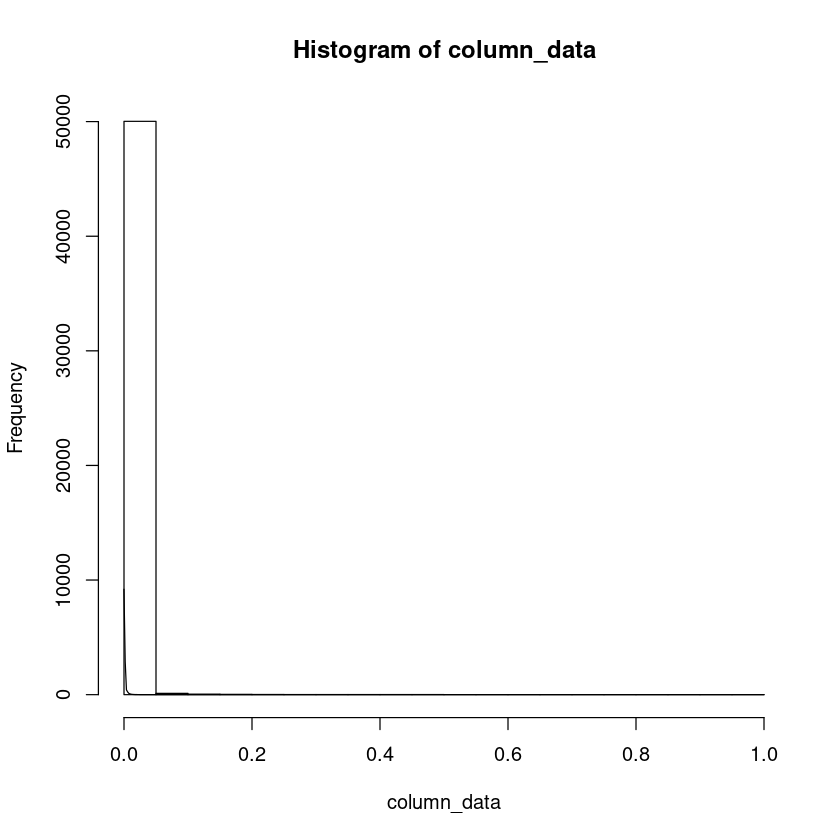

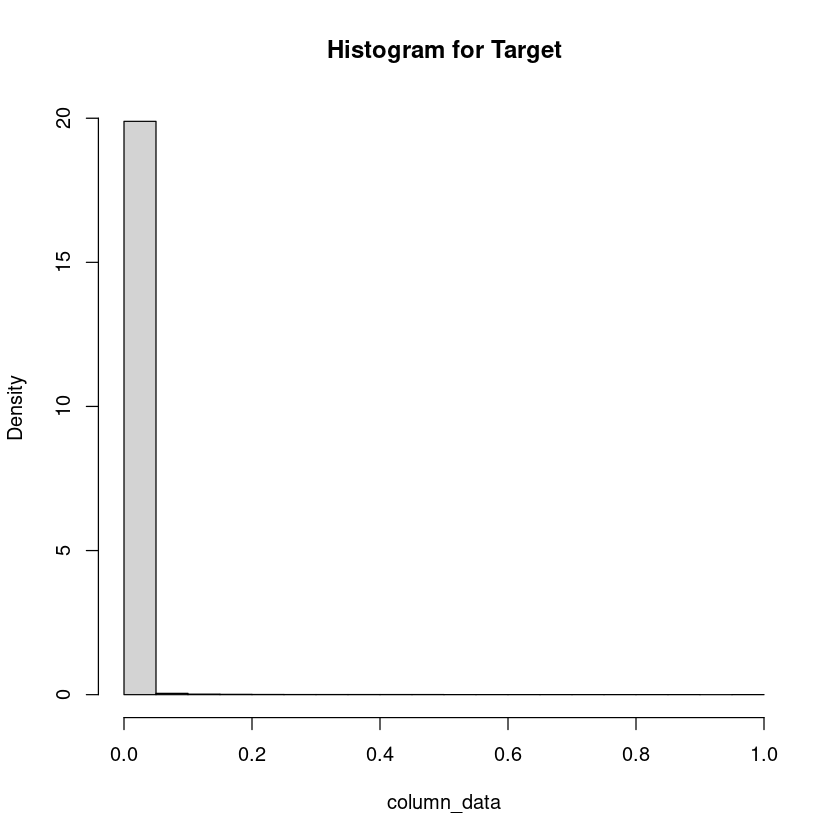

NULL


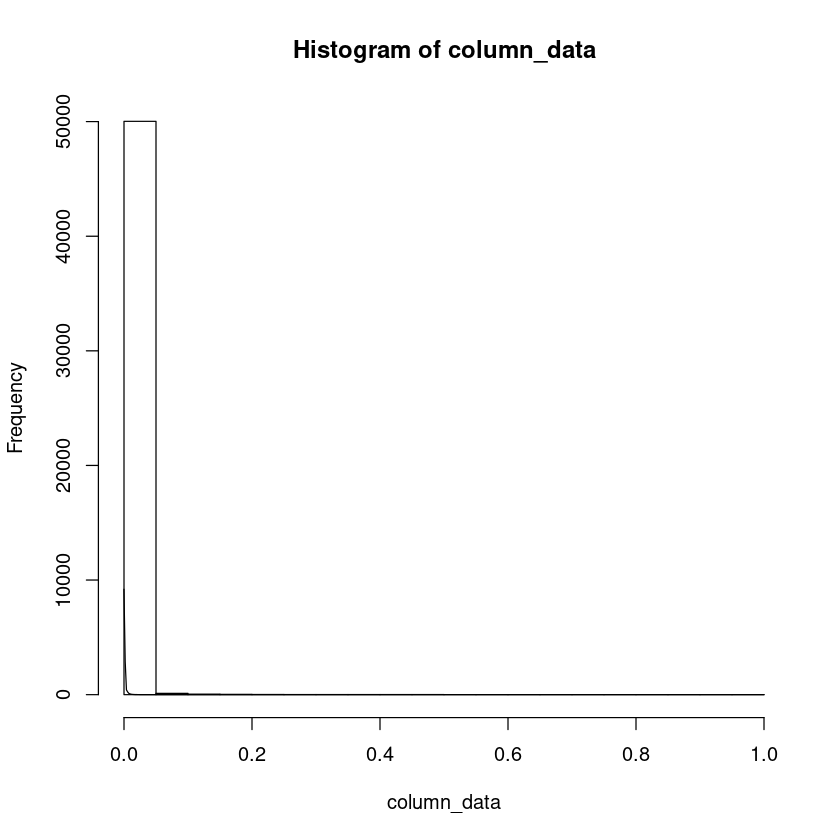

In [26]:
data_normalized <- data
for (col_name in names(numeric_cols)[numeric_cols]) {
  data_normalized[[col_name]] <- (data[[col_name]] - min(data[[col_name]])) / 
                                 (max(data[[col_name]]) - min(data[[col_name]]))
}

for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_normalized[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}

### Standarization Transform

<font color='tomato'>Select columns</font>

In [27]:
cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Processing column: mun_dest_cod 


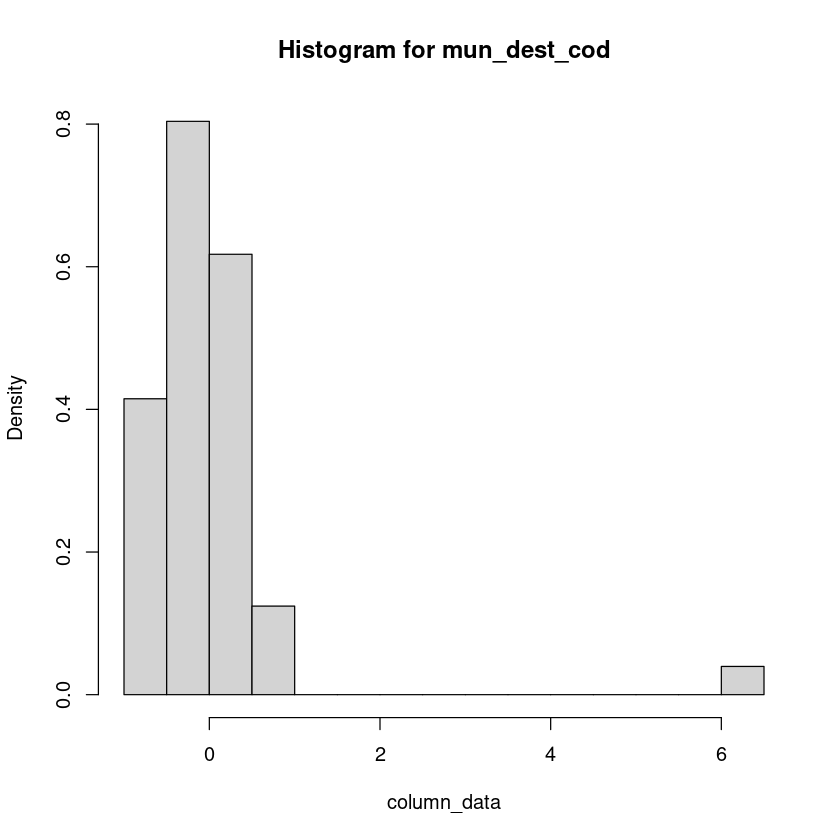

NULL
Processing column: turistas 


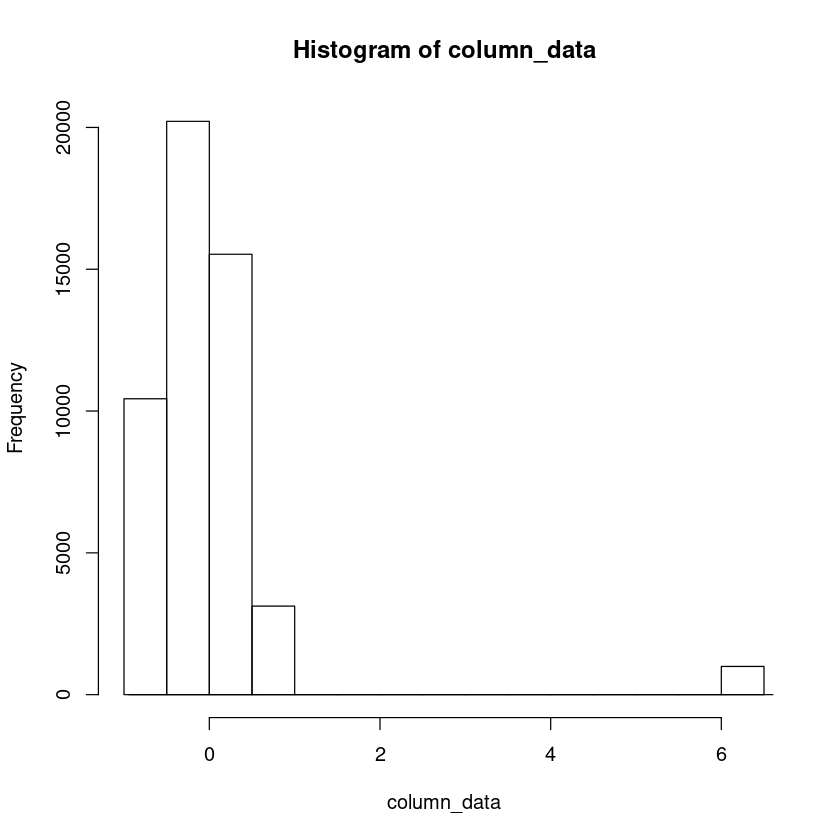

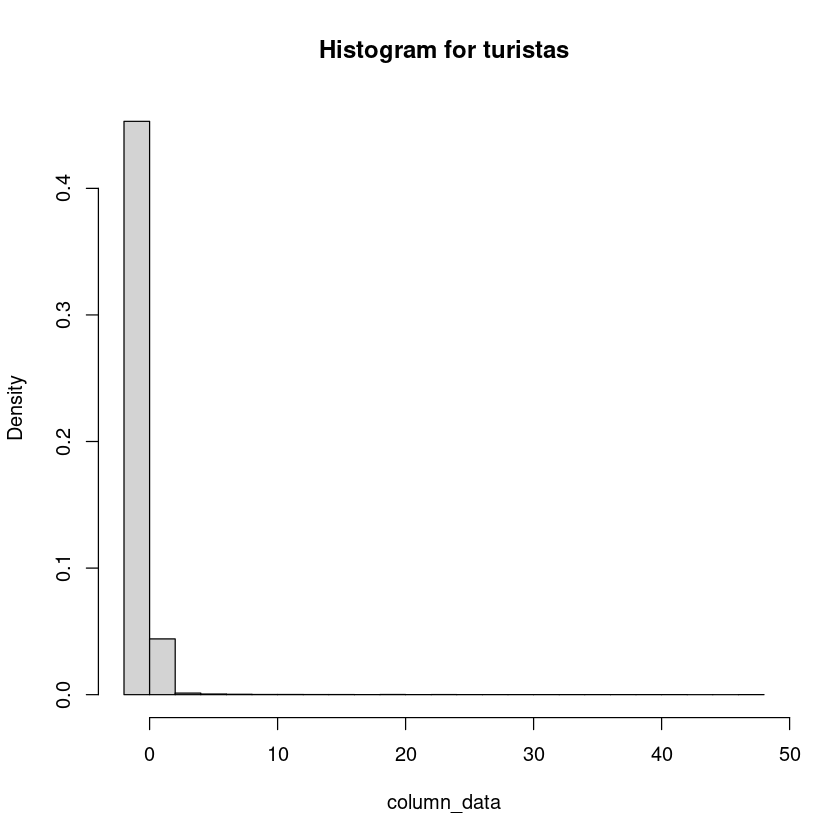

NULL
Processing column: Target 


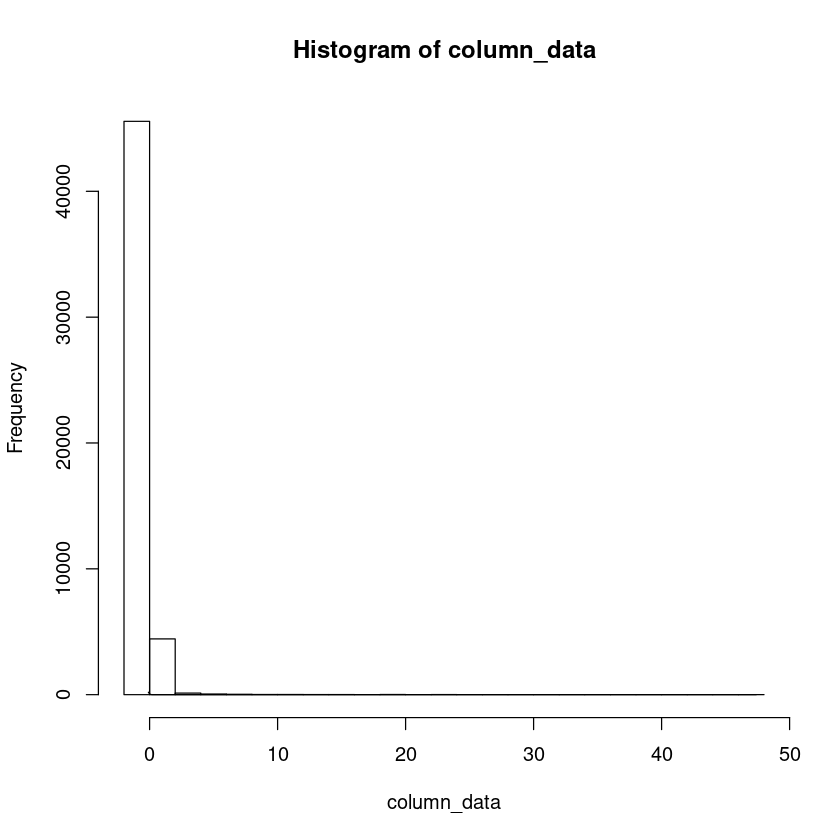

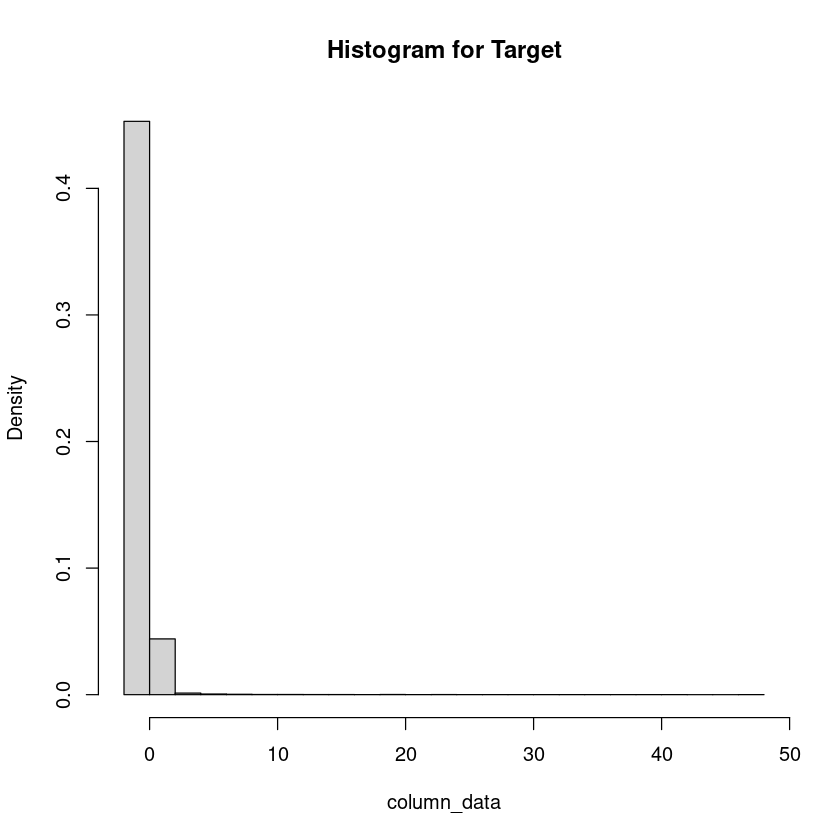

NULL


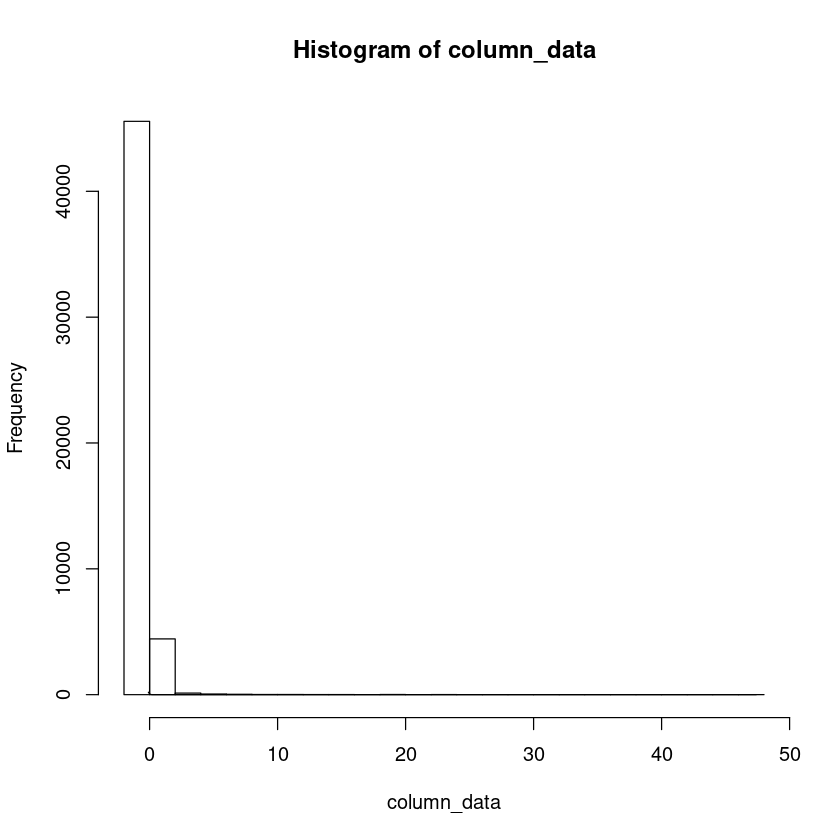

In [28]:
data_standardized <- data

for (col_name in names(numeric_cols)[numeric_cols]) {
  data_standardized[[col_name]] <- scale(data[[col_name]])
}
for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_standardized[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}

## Numeric Variable Transformation: Distribution

###	Discretization Transform

##### Evaluating Discretization Transformations

#### Uniform Discretization Transform

<font color='tomato'>Select columns</font>

In [29]:
cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Processing column: mun_dest_cod 


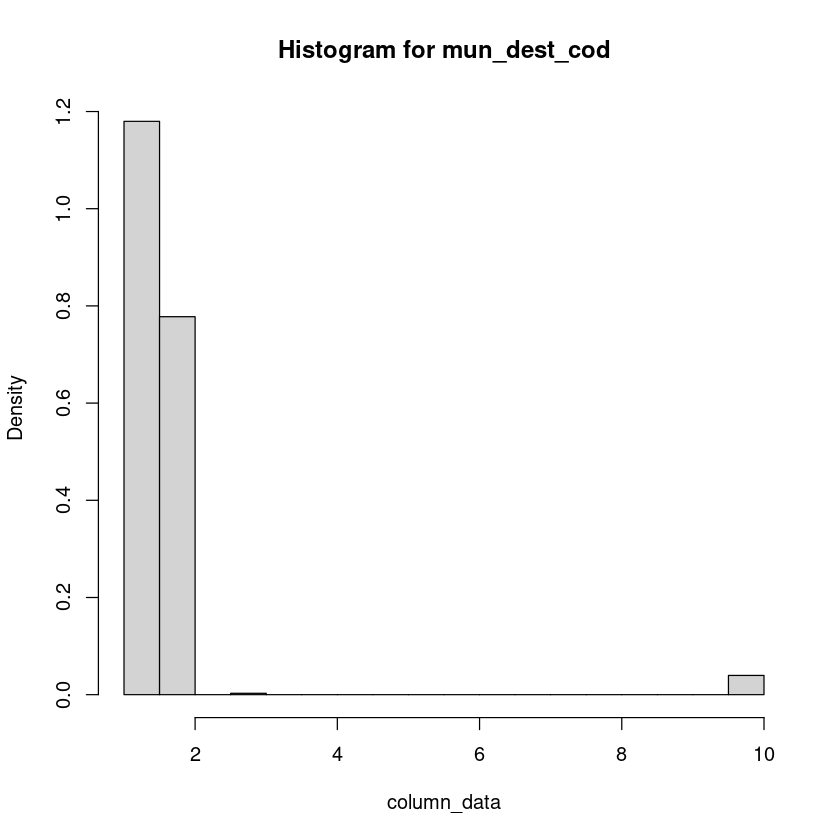

NULL
Processing column: turistas 


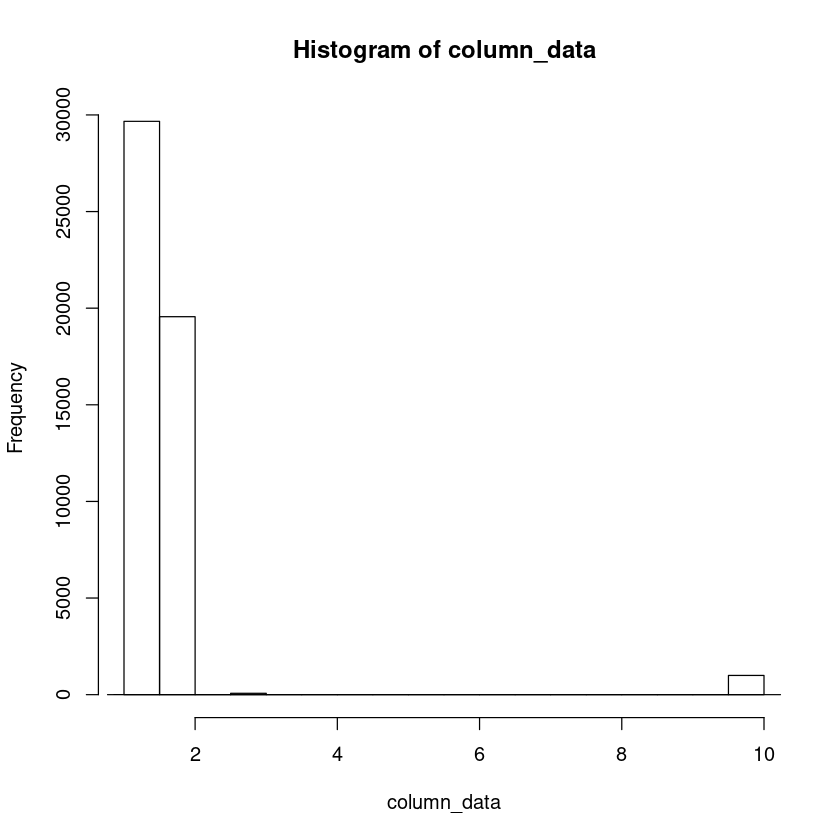

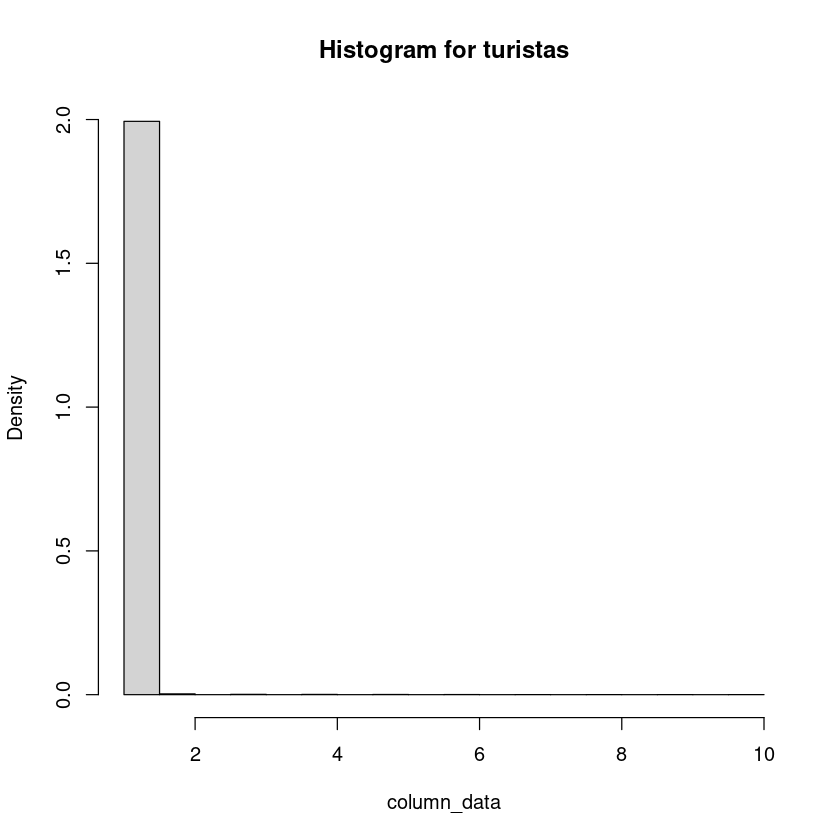

NULL
Processing column: Target 


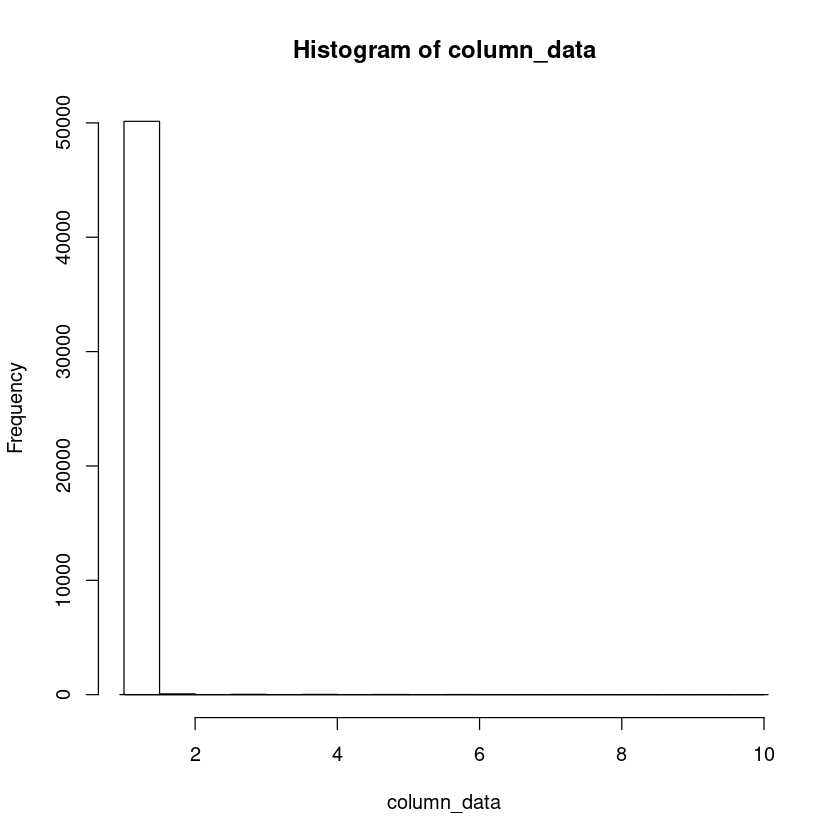

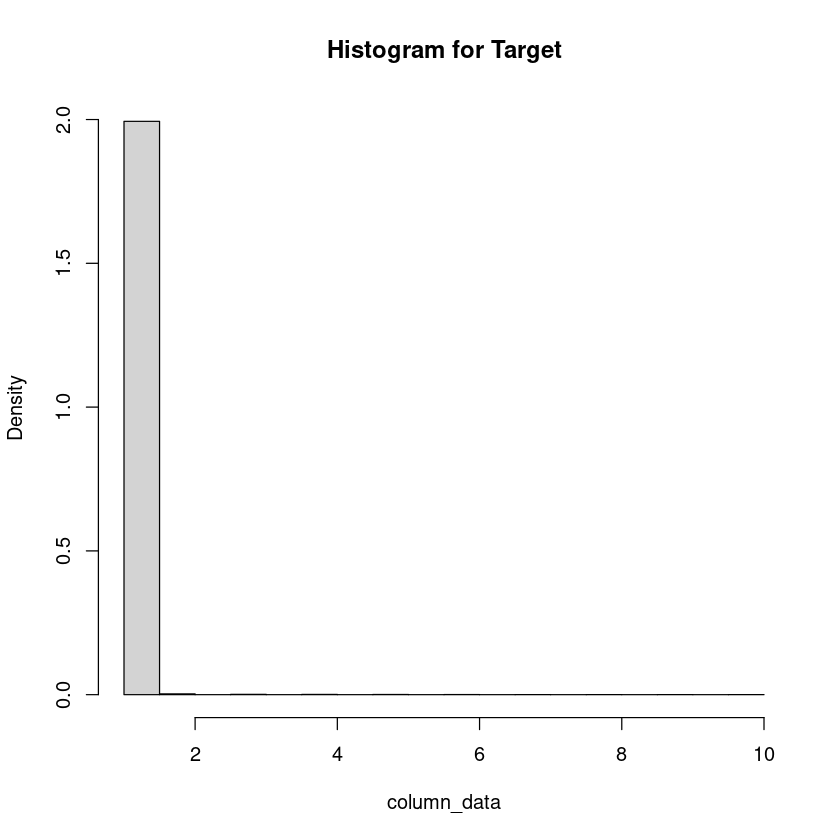

NULL


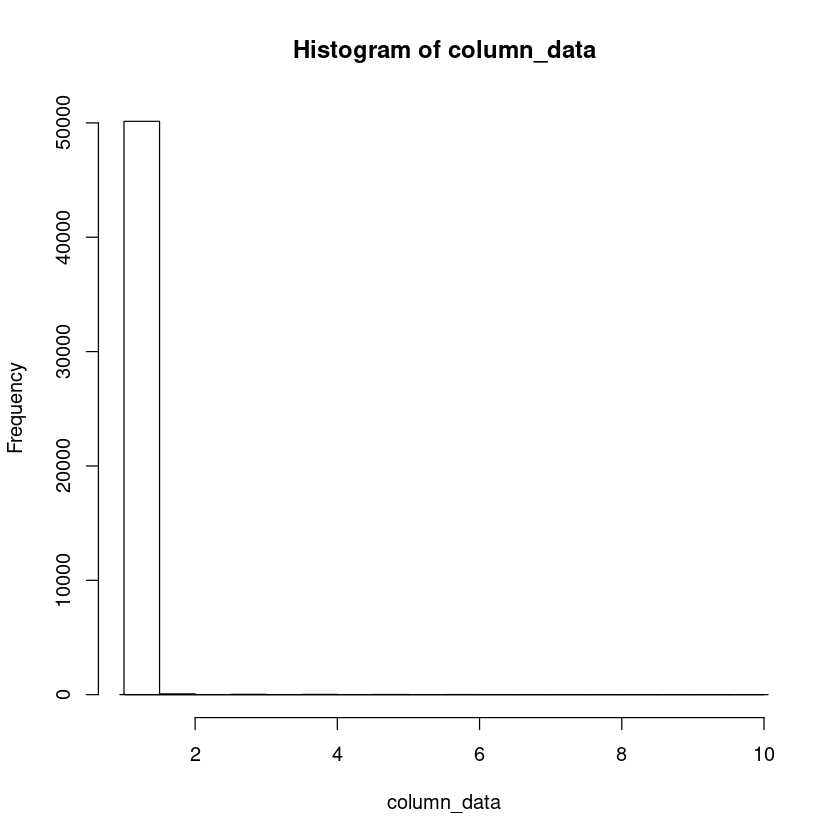

In [30]:
# create a copy of the original data frame
data_discretized <- data

# number of intervals
k <- 10  # change this value according to your needs

# discretize each numeric column
for (col_name in names(numeric_cols)[numeric_cols]) {
  data_discretized[[col_name]] <- cut(data[[col_name]], breaks = k, labels = FALSE)
}
for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_discretized[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}

### Power Transform

#### Data to Transform

##### Evaluating Yeo-Johnson tranform

#### Yeo-Johnson Transform

<font color='tomato'>Select columns</font>

In [31]:
cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Loading required package: bestNormalize



Processing column: mun_dest_cod 


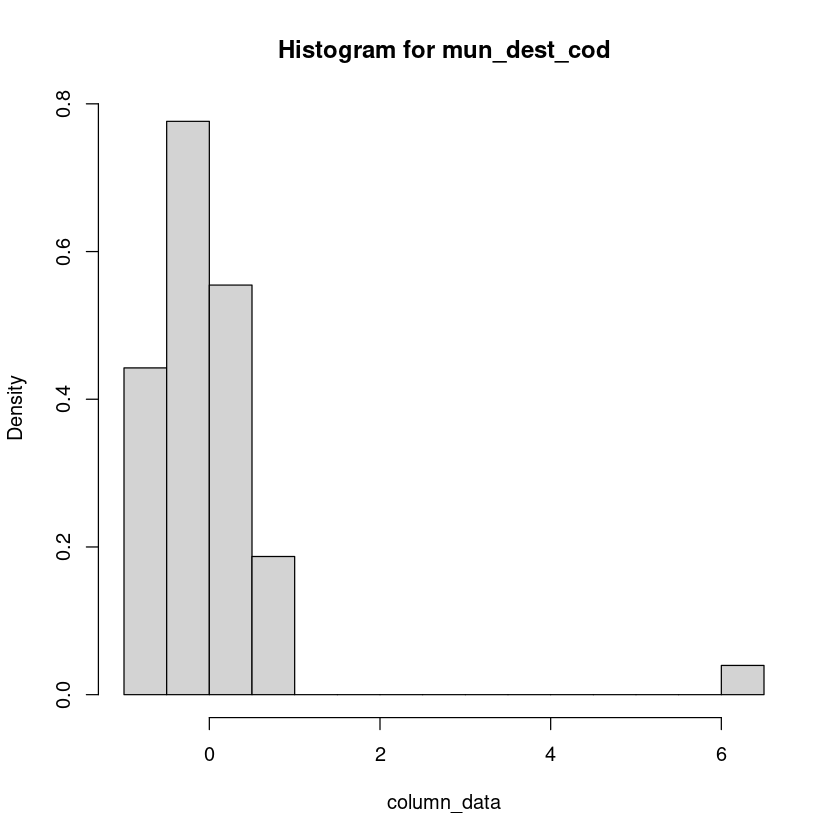

NULL
Processing column: turistas 


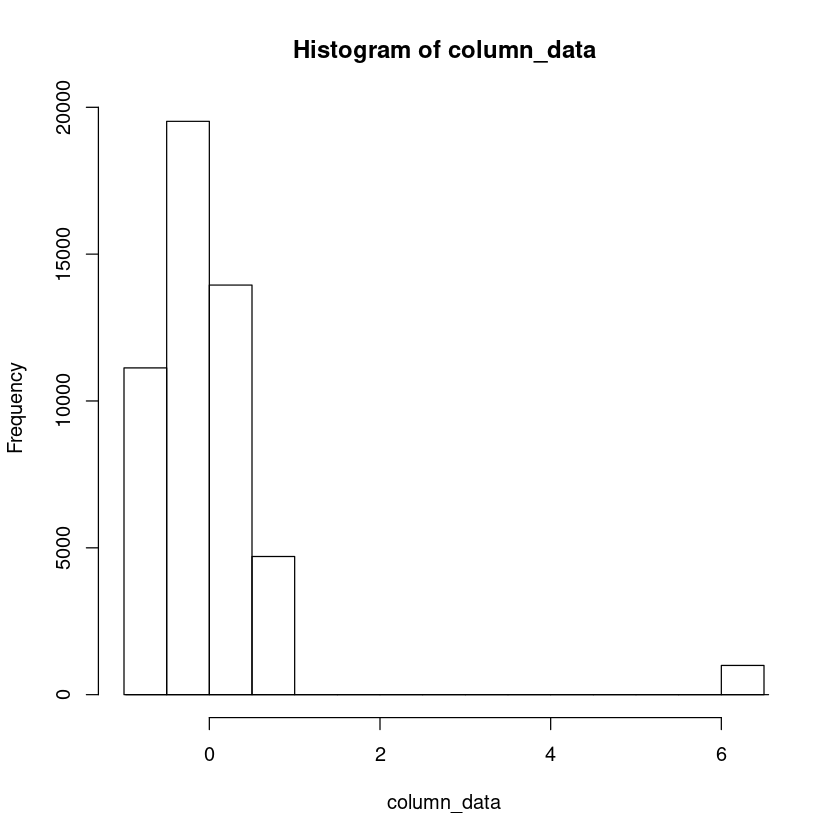

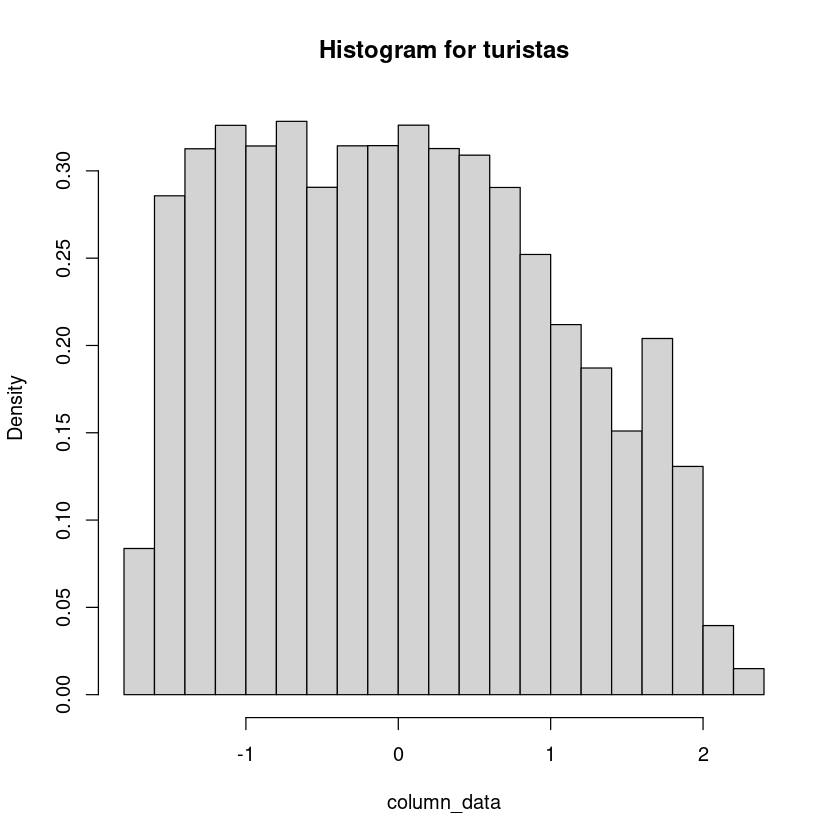

NULL
Processing column: Target 


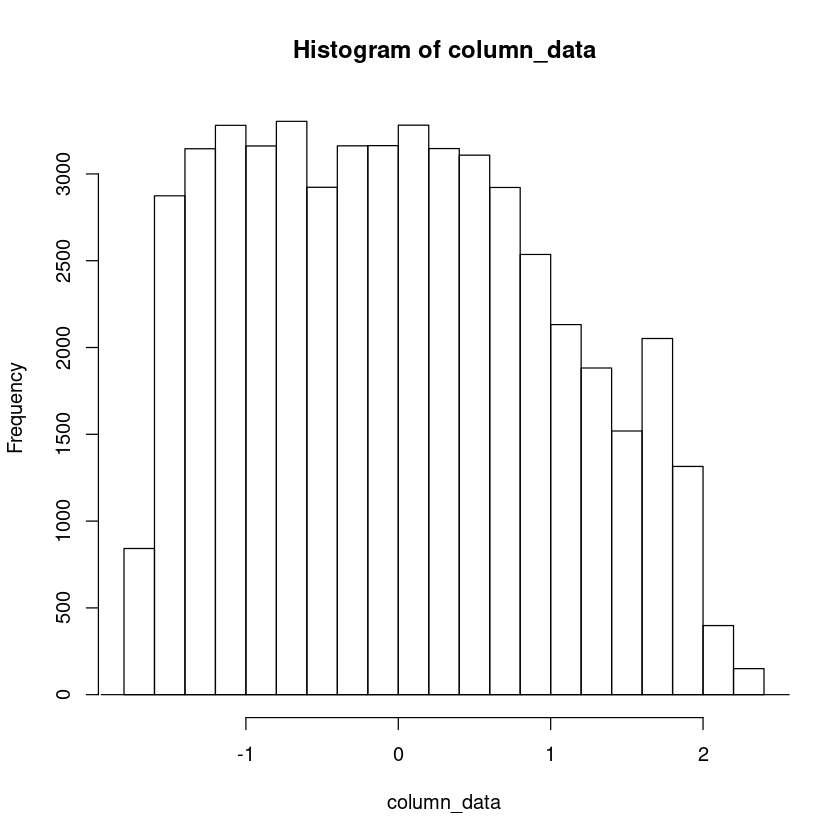

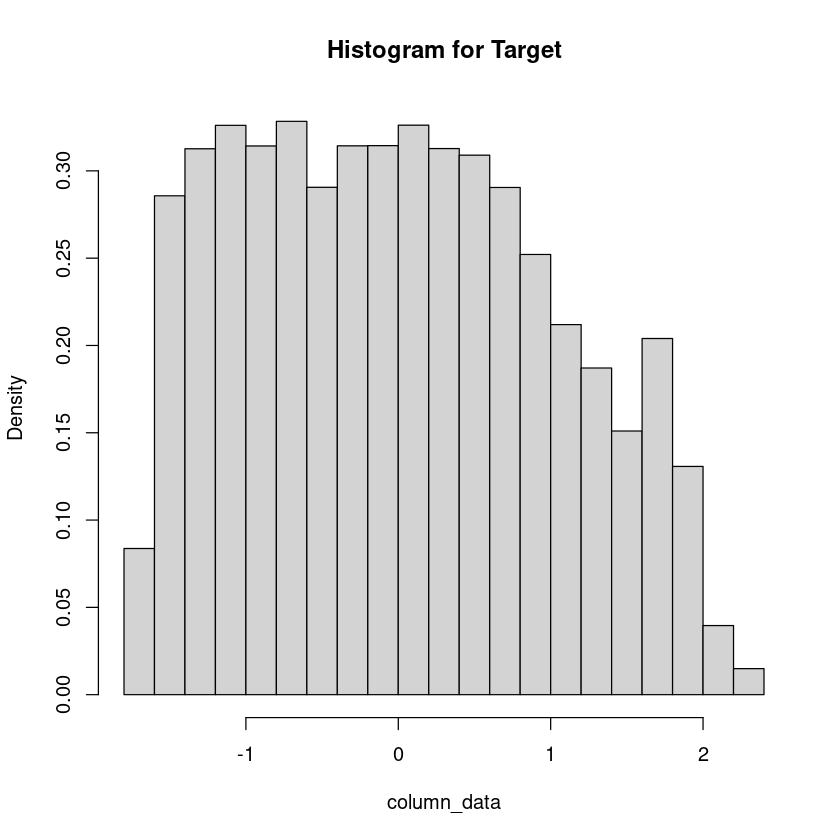

NULL


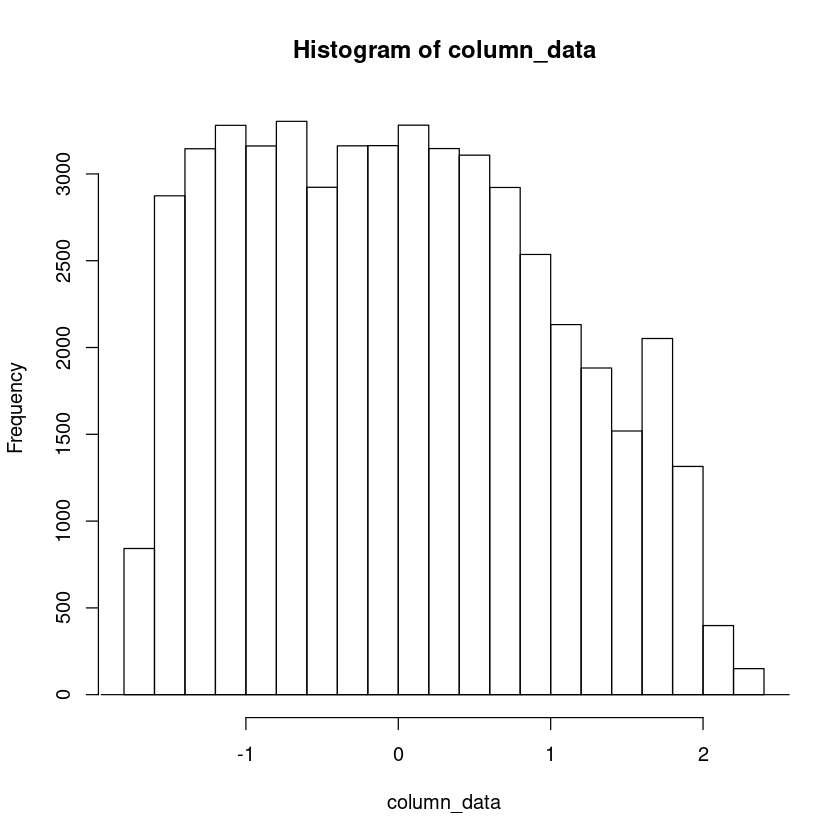

In [32]:
if (!require(bestNormalize)) {
  install.packages('bestNormalize')
}

# load the bestNormalize package
library(bestNormalize)

# assuming 'data' is your data frame

# identify the numeric columns
numeric_cols <- sapply(data, is.numeric)

# create a copy of the original data frame
data_yeojohnson <- data

# apply the Yeo-Johnson transformation to each numeric column
for (col_name in names(numeric_cols)[numeric_cols]) {
  yj <- yeojohnson(data[[col_name]])
  data_yeojohnson[[col_name]] <- yj$x.t
}
for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_yeojohnson[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}